# TP2- Méthode de Runge-Kutta

In [1]:
from math import exp,cos,sin
from math import *
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

## INTRODUCTION
En guise d’introduction, je vous présente l’équation différentielle qui nous accompagnera tout au long de ce tutoriel:

$$(E)\qquad\qquad \frac{dy}{dx}(x)=f\Big(x,y(x)\Big) \,.  $$

Il s’agit d’une équation différentielle du premier ordre:
* La variable réelle $x$ compris entre une valeur initiale $x_0$ et une valeur limite $x_{\max}$ ;
* $y$ est une fonction réelle qui dépend de $x$, et $\frac{dy}{dx}$ est sa dérivée;
* $f$ est une fonction réelle de $y(x)$ et $x$.
* On note $y_0$ la valeur initiale de $y$, ce qui signifie simplement que $y(x_0) = y_0$.

### Discrétisation du temps

Il est difficile pour un ordinateur de travailler avec des fonctions continues quelconques. Pour éviter ce problème, il est courant de commencer par discrétiser l'intervalle $[x_0,x_{\max}]$ lors de la résolution numérique des équations différentielles. Autrement dit, on ne considère que certains instants particuliers, et on ignore ce qu’il se passe en dehors de ces instants. Formellement, on forme une suite croissante d’instants $x_{i}$ pris dans l’intervalle $[x_0,x_{\max}]$.

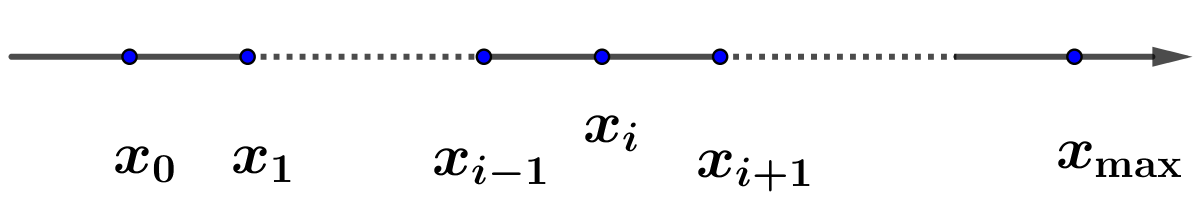

La résolution numérique consiste à calculer approximativement les $y_i=y(x_i)$, et obtenir ainsi une solution numérique, qu’on espère fidèle à la solution exacte.

L'idée de base est de construire une suite $ y_{i} $ donnant une approximation de la solution de l'équation différentielle $(E)$ en fonction de $x_{i}$ pour $ i\in \mathbb{N} $.

Cette suite est définie par:
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
$$ y_{i+1} = y_i + M(x_i, y_i, h)\,,\qquad h=x_{i+1}-x_i \,,
$$    
</p>
</div>

pour une certaine fonction $ M $ appelée méthode.


*  Pour la méthode d'*`Euler explicite`*, la fonction $ M $ est donnée par:
	$$ M(x, y, h) = h f(x,y)\,.
	$$
* Une méthode de *`Runge-Kutta`* d'ordre *`deux`* est donnée par:
	$$  M(x,y, h) = h f\bigg(x+\frac{h}{2},~ y + \frac{h}{2} f(x,y) \bigg) \,.
	$$
* Une méthode de *`Runge-Kutta`* d'ordre *`quatre`* est donnée par:
	$$ M(x,y, h) = \frac{h}{6} \Big(\boldsymbol{k}_1 + 2\boldsymbol{k}_2 + 2\boldsymbol{k}_3 + \boldsymbol{k}_4\Big) \,,
	$$
	où
	\begin{align*}
		\boldsymbol{k}_{1} & =f(x,y)\,,\\
		\boldsymbol{k}_{2} &
		=f\bigg(x+\frac{h}{2},y+\frac{h}{2}\boldsymbol{k}_{1}\bigg)\,,\\
		\boldsymbol{k}_{3} & =f\bigg(x+\frac{h}{2},y+\frac{h}{2}\boldsymbol{k}_{2}\bigg)\,,\\ 
		\boldsymbol{k}_{4} & =f(x+h,y+h\boldsymbol{k}_{3})\,. 
	\end{align*}
* À noter que plus généralement, une méthode de *`Runge-Kutta`* d'ordre $ `s` $ est donnée par:
	$$ M(x,y,h) = h \sum_{i=1}^s b_i \boldsymbol{k}_i \,,
	$$
	où
	\begin{align*} 
		\boldsymbol{k}_{1} & =f(x,y)\,,\\
		\boldsymbol{k}_{2} & =f(x+c_{2}h,y+ha_{21}\boldsymbol{k}_{1})\,,\\ \boldsymbol{k}_{3} & =f\Big(x+c_{3}h,y+h(a_{31}\boldsymbol{k}_{1}+a_{32}\boldsymbol{k}_{2})\Big)\,,\\
		& \vdots\\
		\boldsymbol{k}_{s} & =f\Big(x+c_{s}h,y+h(a_{s1}\boldsymbol{k}_{1}+a_{s2}\boldsymbol{k}_{2}+\cdots+a_{s,s-1}\boldsymbol{k}_{s-1})\Big)\,. 
	\end{align*}
	Les coefficients $a_{ij}$ (pour $ 1\leq j\leq i\leq s) $, $ c_i $ (pour $ 2\leq i\leq s $), et $ b_i $ (pour $ 1\leq i\leq s $), sont souvent représentés dans un tableau de Butcher:
	$$ \begin{array}{c|ccccc}
		0\\ c_{2} & a_{21}\\ c_{3} & a_{31} & a_{32}\\ \vdots & \vdots & & \ddots\\ c_{s} & a_{s1} & a_{s2} & \cdots & a_{s,s-1}\\ \hline & b_{1} & b_{2} & \cdots & b_{s-1} & b_{s} 
	\end{array}
	$$	  
	Par exemple, le tableau de Butcher de la méthode précédente d'ordre deux est:
	$$ 
	\begin{array}{c|cc} 
		0\\ \frac{1}{2} & \frac{1}{2}\\ \hline & 0 & 1 
	\end{array}
	$$
	et celui de la méthode d'ordre quatre:
	$$ \begin{array}{c|cccc} 
		0\\ \frac{1}{2} & \frac{1}{2}\\ \frac{1}{2} & 0 & \frac{1}{2}\\ 1 & 0 & 0 & 1\\ \hline & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6} 
	\end{array}
	$$

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">

    On considère l'équation différentielle suivante          
</p>
</div>
$$(E):\qquad\qquad y' - y =1\quad \text{avec}\quad y(0) = 0\,.$$

In [2]:
def f(x,y):
    return y+1

## MÉTHODE DE RUNGE-KUTTA D'ORDRE 2

#### EXERCICE I:
<b>Objectif</b> : Programmer la méthode de `Runge-Kutta` d'ordre `2` pour résoudre l'équation différentielle $(E)$ sur l'intervalle $[0;~4]$.

__Question1.__ Ecrire une fonction `RungeKutta2` qui prend en arguments la fonction ` f ` les valeurs initiales $ x_0 $ et $y_0=y(x_0)$, le pas $ h $ et la valeur maximale $ x_{\rm max} $. La fonction "RungeKutta2" construit la liste  $ liste\_x $  des abscisses $ x_{k} $ et la liste $ liste\_y $  des ordonnées $ y_{k} $ (valeurs approchées de $y(x_k))$ en utilisant une boucle `while`, puis renvoie ces deux listes.

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#EEECF9;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
N.B. pour les valeurs de la liste $ liste\_x $ on doit utiliser la fonction <i>round (nombre, 6)</i>.
</p>
</div>

In [3]:
x0, xmax = 0, 4
y0 = 0

def RungeKutta2(f, x0, y0, h, xmax):
    liste_x = [round(x0 + i * h, 6) for i in range(int((xmax - x0) / h) + 1)]
    
    liste_y = []
    y = y0
    for x in liste_x:
        liste_y.append(y)
        y += h * f(x + h / 2, y + h / 2 * f(x, y))
    
    return liste_x, liste_y

__Question2.__ Tester le programme pour $h = 1$ et $h=0.4$ avec l'instruction  `print(RungeKutta2(f,x0,y0,h,xmax))`.

In [4]:
for h in (1, 0.4):
    print(RungeKutta2(f, x0, y0, h, xmax))

([0, 1, 2, 3, 4], [0, 1.5, 5.25, 14.625, 38.0625])
([0.0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6, 4.0], [0, 0.48, 1.1904, 2.241792, 3.7978521599999997, 6.1008211968, 9.509215371264, 14.553638749470721, 22.01938534921667, 33.06869031684067, 49.4216616689242])


#### Comparaison numérique avec la solution exacte
<b> Question3.</b> La solution exacte de l'equation $(E)$ est connue, $$y_{\rm ex}(x) = e^x-1\,.$$ 
Compléter le programme en créant une nouvelle fonction `erreur` qui prend en arguments le pas $h$ et qui doit calculer l'erreur $$\text{ERREUR}=\max\limits_{0\leq i \leq \max} |y_{\rm ex}(x_i) - y(x_i)|$$ puis afficher l'erreur  obtenue. Effectuer des test avec $ h $ prenant les valeurs $1,\, 0.5,\, 0.2,\, 0.1$.

In [5]:
def erreur(h, approx):
    def yex(x):
        return exp(x) - 1
    
    liste_x, liste_y = approx(f, x0, y0, h, xmax)
    return max(abs(yex(x) - y) for x, y in zip(liste_x, liste_y))
        
for h in (1, 0.5, 0.2, 0.1):
    print(erreur(h, approx=RungeKutta2))

15.535650033144236
5.976810175565959
1.2405099178877705
0.336734286745326


#### Comparaison graphique avec la solution exacte
<b>Question4.</b> Tracer sur une même figure les courbes représentatives de la solution exacte $y_{\rm ex}$ et des solutions approchées pour $ h $ prenant les valeurs $1,\, 0.5,\, 0.2,\, 0.1$. sur l'intervalle $ [0,4] $.
Pour tracer les courbes:
* Ajouter un titre au graphique __RK2-Comparaison graphique de chaque pas avec la solution exacte__
* Ajouter une `légende` avec le nom pour chaque courbe.
* Ajouter des `libellés` sur les axes
    * `plt.xlabel('x - axe des abscisses ')` 
    * `plt.ylabel('y - axe des ordonnées')`
* Il est possible de préciser la `couleur` et le `style` de chaque courbe (pour la solution exacte on prend le style "--").
* Pour tracer la solution exacte c'est mieux de prendre les valeurs `x=np.linspace(0,4,100)`.
* Afficher le graphe

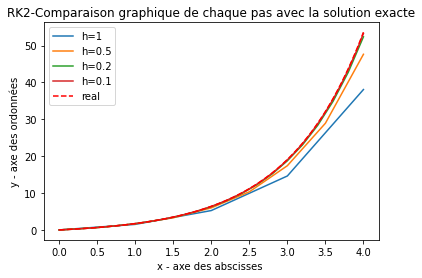

In [6]:
plt.title("RK2-Comparaison graphique de chaque pas avec la solution exacte")
plt.xlabel('x - axe des abscisses ')
plt.ylabel('y - axe des ordonnées')

for h in (1, 0.5, 0.2, 0.1):
    plt.plot(*RungeKutta2(f, x0, y0, h, xmax), label=f"h={h}")

real_x = np.linspace(x0, xmax, 100)
real_y = np.exp(real_x) - 1

plt.plot(real_x, real_y, 'r--', label="real")
plt.legend()
plt.show();

## MÉTHODE DE RUNGE-KUTTA D'ORDRE 4

#### EXERCICE II:
<b>Objectif</b> : Programmer la méthode de `Runge-Kutta` d'ordre `4` pour résoudre l'équation différentielle $(E)$  sur l'intervalle $[0;~4]$.

__Question1.__ Ecrire une fonction `RungeKutta4` qui prend en arguments la fonction $ f $ les valeurs initiales $ x_0 $ et $y_0=y(x_0)$, le pas $ h $ et la valeur maximale $ x_{\rm max} $. La fonction `RungeKutta4` construit la liste  $ liste\_x $  des abscisses $ x_{k} $ et la liste $ liste\_y $  des ordonnées $ y_{k} $ (valeurs approchées de $y(x_k))$ en utilisant une boucle `while`, puis renvoie ces deux listes.
<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#EEECF9;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
N.B. pour les valeurs de la liste $ liste\_x $ on doit utiliser la fonction <i>round (nombre, 6)</i>.
</p>
</div>

In [7]:
def RungeKutta4(f, x0, y0, h, xmax):
    liste_x = [round(x0 + i * h, 6) for i in range(int((xmax - x0) / h) + 1)]
    
    liste_y = []
    y = y0
    for x in liste_x:
        liste_y.append(y)
        
        k1 = f(x, y)
        k2 = f(x + h / 2, y + h / 2 * k1)
        k3 = f(x + h / 2, y + h / 2 * k2)
        k4 = f(x + h, y + h * k3)
        
        y += h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    
    return liste_x, liste_y

__Question2.__ Tester le programme pour $h = 1$ et $h=0.4$ avec l'instruction  `print(RungeKutta4(f,x0,y0,h,xmax))`.

In [8]:
for h in (1, 0.4):
    print(RungeKutta4(f, x0, y0, h, xmax))

([0, 1, 2, 3, 4], [0, 1.7083333333333333, 6.335069444444444, 18.8658130787037, 52.80324375482252])
([0.0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6, 4.0], [0, 0.4917333333333333, 1.2252683377777778, 2.3195069550743703, 3.951819175116274, 6.386793724160116, 10.019126424787117, 15.437598192069103, 23.520513143049214, 35.578066805924614, 53.564721523291276])


<b>Question3.</b> En utilisant la même fonction de l'exercice __I Q3__. Afficher l'erreur  obtenue avec $ h $ prenant les valeurs $1,\, 0.5,\, 0.2,\, 0.1$.

In [9]:
for h in (1, 0.5, 0.2, 0.1):
    print(erreur(h, approx=RungeKutta4))

0.7949062783217187
0.07513228816920758
0.002465807633356576
0.0001674588643609809


<b>Question4.</b> Tracer sur une même figure les courbes représentatives de la solution exacte $y_{\rm ex}$ et des solutions approchées pour $ h $ prenant les valeurs $1,\, 0.5,\, 0.2,\, 0.1$. sur l'intervalle $ [0,4] $.

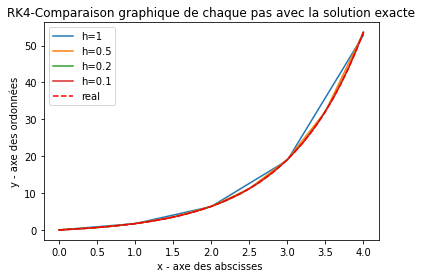

In [11]:
plt.title("RK4-Comparaison graphique de chaque pas avec la solution exacte")
plt.xlabel('x - axe des abscisses ')
plt.ylabel('y - axe des ordonnées')

for h in (1, 0.5, 0.2, 0.1):
    plt.plot(*RungeKutta4(f, x0, y0, h, xmax), label=f"h={h}")

real_x = np.linspace(x0, xmax, 100)
real_y = np.exp(real_x) - 1

plt.plot(real_x, real_y, 'r--', label="real")
plt.legend()
plt.show();

## COMPARAISON LES TROIS SCÉMAS NUMÉRIQUES POUR LA RÉSOLUTION APPROCHÉE DE l'EQUATION DIFFERENTIELLE $(E)$

#### EXERCICE III:

### A) Comparaison graphique

<b>Objectif</b> : Le but est de représenter et comparer graphiquement les solutions approchées données par plusieurs schémas `EULER`, `RUNGE-KUTTA` d'ordre `2` et `4` et de comparer les erreurs des ces schémas. 

__Question1.__ En utilisant les trois fonctions `Euler`, `RungeKutta2` et `RungeKutta4`, tracer sur une même figure les courbes représentatives de la solution exacte $y_{\rm ex}$ et des solutions approchées de l'équation différentielle $(E)$ de ces trois méthodes, pour $ n $ prenant les valeurs $4,\, 10,\, 100,\, 1000$. sur l'intervalle $ [0,4] $.
* Rappelons que $h=4/n$.
* Utiliser `fig, axs = plt.subplots(2,2,figsize=(15,10))` pour tracer les $4$ cas suivant $n$.
* Utiliser `x = np.linspace(0, 4, 1000)` pour tracer la courbe de solution exacte.

In [17]:
def euler(f, x0, y0, h, xmax):
    x, y = x0, y0
    list_x, list_y = [], []
    i = 0
    while (x <= xmax):
        list_x.append(x)
        list_y.append(y)
        
        i += 1
        x = h * i
        y += h * f(x, y)
    
    return list_x, list_y

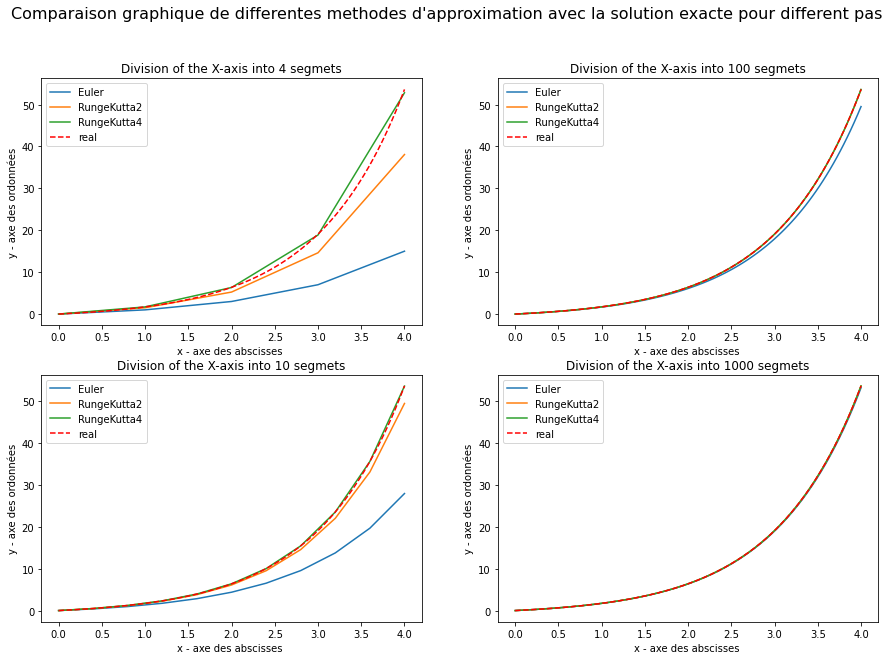

In [21]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
fig.suptitle("Comparaison graphique de differentes methodes d'approximation avec la solution exacte pour different pas", fontsize=16)

for i, n in enumerate((4, 10, 100, 1000)):
    cur_plt = axs[i % 2, i // 2]
    
    cur_plt.set_title(f"Division of the X-axis into {n} segmets")
    cur_plt.set_xlabel('x - axe des abscisses ')
    cur_plt.set_ylabel('y - axe des ordonnées')
    
    h = 4 / n
    cur_plt.plot(*euler(f, x0, y0, h, xmax), label="Euler")
    cur_plt.plot(*RungeKutta2(f, x0, y0, h, xmax), label="RungeKutta2")
    cur_plt.plot(*RungeKutta4(f, x0, y0, h, xmax), label="RungeKutta4")

    real_x = np.linspace(0, 4, 1000)
    real_y = np.exp(real_x) - 1

    cur_plt.plot(real_x, real_y, 'r--', label="real")
    cur_plt.legend()

plt.show();

<b>Question2.</b> En utilisant les trois fonctions `Euler`, `RungeKutta2` et `RungeKutta4`, écrire un programme qui doit comparer les trois méthodes sur la même équation différentielle $(E)$ pour $ n=4 $, $ n = 10 $, $ n = 100 $ et $ n = 1000 $, en regardant  l'approximation finale $y[-1]$ et en calculant l'erreur de chaque méthode.


* Créer une fonction `erreur_M` qui prend en arguments les valeurs de $h$ et `methode` de chaque méthode et qui doit calculer l'erreur $$\text{ERREUR}=\max |y_{\rm ex}(x_k) - y(x_k)|$$ et retour l'erreur  obtenue et la dernière valeur de la solution approchée.
* Utiliser la boucle `for n in [4, 10, 100, 1000] ` pour calculer à chaque pas $h=4/n$ l'erreur de chaque méthode.

In [27]:
def erreur_M(h, methode):
    def yex(x):
        return exp(x) - 1
    
    liste_x, liste_y = methode(f, x0, y0, h, xmax)
    return max(abs(yex(x) - y) for x, y in zip(liste_x, liste_y)), liste_y[-1]


for n in (4, 10, 100, 1000):
    print(f"For n='{n}'")
    h = 4 / n
    euler_e, _ = erreur_M(h, euler)
    RungeKutta2_e, _ = erreur_M(h, RungeKutta2)
    RungeKutta4_e, _ = erreur_M(h, RungeKutta4)
    
    print(f"  Euler's error: {euler_e: .6f}",
          f"  RungeKutta2's error: {RungeKutta2_e: .6f}",
          f"  RungeKutta4's error: {RungeKutta4_e: .6f}", sep='\n')
    print()

For n='4'
  Euler's error:  38.598150
  RungeKutta2's error:  15.535650
  RungeKutta4's error:  0.794906

For n='10'
  Euler's error:  25.672685
  RungeKutta2's error:  4.176488
  RungeKutta4's error:  0.033429

For n='100'
  Euler's error:  4.093202
  RungeKutta2's error:  0.056490
  RungeKutta4's error:  0.000005

For n='1000'
  Euler's error:  0.433891
  RungeKutta2's error:  0.000581
  RungeKutta4's error:  0.000000



__Question3__  Que peut on conclure?

RungeKutta4 pour `n=10` est 10x plus precise qu'Euleur avec `n=1000`

On remarque aussi que lorsque l'echantillonage `n` augmente, la precision relative de RungeKutta4 par rapport a Euler et RungeKutta2 augmente significativement.

Ansi pour `n=4`, RungeKutta4 est 45x plus precise qu'Euler, alors que pour `n=100`, RungeKutta4 est 1e6 fois plus precise qu'Euler

### B) Ordre et vitesse de convergence

<b>Objectif</b> : Le but est de représenter graphiquement les erreurs données par plusieurs schémas `EULER`, `RUNGE-KUTTA` d'ordre `2` et `4` et de retouver graphiquement et numériquement leur ordre.

### Graphiquement

__Question4__ Reprendre la fonction `erreur_M(h,methode)` de __Q1__. Ecrire le programme principal permettant le tracé (avec une échelle logarithmique) les erreurs globales pour chaque pas $h$ des ces trois schémas. Pour tracer les courbes:

* Ajouter un titre au graphique __Ordre et vitesse de convergence__
* Pour une méthode donnée le tracé de l'erreur correspond au tracé de l'ensemble des points `h =np.linspace(1E-3, 1E-1, 10)`.
* Tracer dans la mėme figure les fonctions suivantes (qui nous aide à trouver graphiquement l'orde de chaque schéma):
    * `plt.loglog(h,10*h,'b',label="$O(h)$")`
    * `plt.plt.loglog(h,10*h**2,'r',label="$O(h^2)$")`
    * `plt.loglog(h,0.1*h**4,'g',label="$O(h^4)$")`
* Ajouter une `légende` avec le nom pour chaque courbe. 
* Il est possible de préciser la `couleur` et le `style` de chaque courbe (on prend le style `"--bo"`,`"r:*"`,`"g<-."` )
* Ajouter des `libellés` sur les axes
    * `plt.xlabel('h ')` 
    * `plt.ylabel('erreur')`
* Il est possible d'utiliser `plt.loglog` afin de tracer les courbes.

* Afficher le graphe

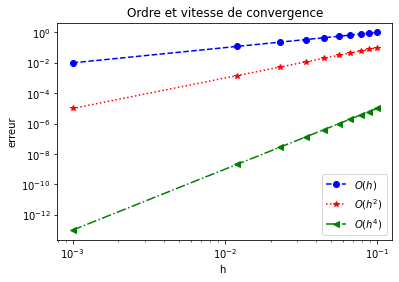

In [34]:
plt.title("Ordre et vitesse de convergence")
h = np.linspace(1E-3, 1E-1, 10)

plt.loglog(h, 10  * h,      "--bo", label="$O(h)$")
plt.loglog(h, 10  * h ** 2,  "r:*", label="$O(h^2)$")
plt.loglog(h, 0.1 * h ** 4, "g<-.", label="$O(h^4)$")

plt.xlabel('h ')
plt.ylabel('erreur')
plt.legend()

plt.plot();

__Question5__ Déterminer graphiquement l'ordre de chaque méthode.

### Analytiquement (Retrouver alors l'ordre de convergence effectif de la méthode en utilisant la fonction polyfit de numpy).

Pour déterminer l'ordre de convergence de la méthode, il faut revenir à la définition de cette notion. L'erreur globale d'une méthode d'ordre $p$, avec $p$ un entier, décroît avec le pas de discrétisation $h$ comme $O(h^p )$ et l'on a donc, pour h suffisamment petit,
$$erreur \approx C(h^p)\,.$$ 
avec $C$ une constante. En prenant le logarithme de cette relation, il vient
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
$$\ln(erreur) \approx p \ln(h) + \ln(C)\,.$$   
</p>
</div>
Il suffit donc, à partir des valeurs de l'erreur approchée obtenue avec les différents choix de pas.

__Question6__ Déterminer la pente de la droite (`l'ordre de la convergence`) obtenue par une régression
linéaire au moyen de la fonction polyfit pour chaque méthode.
<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#EEECF9;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
N.B. pour les valeurs obtenus, on doit utiliser la fonction <i>round (nombre, 1)</i>.
</p>
</div>